<a href="https://colab.research.google.com/github/hichemfelouat/my-codes-of-machine-learning/blob/master/DifFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DifFace: Blind Face Restoration with Diffused Error Contraction**

[Paper](https://arxiv.org/abs/2212.06512)

[Github](https://github.com/zsyOAOA/DifFace)

[Demo](https://huggingface.co/spaces/OAOA/DifFace)

This notebook written by [Hichem Felouat](https://github.com/hichemfelouat)

## **Setup Conda Environment**

In [ ]:
# Install Miniconda3
# https://github.com/conda-incubator/condacolab
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


In [ ]:
import os
os.chdir("/content")
CODE_DIR = "DifFace"
print("Done...")

Done...


## **Clone Repository**

In [ ]:
# Clone Repository
!git clone https://github.com/zsyOAOA/DifFace.git $CODE_DIR


Cloning into 'DifFace'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (290/290), done.
remote: Total 346 (delta 59), reused 336 (delta 52), pack-reused 0
Receiving objects: 100% (346/346), 15.72 MiB | 20.41 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
os.chdir(f"./{CODE_DIR}")
print("Done...")

Done...


In [ ]:
"""
Managing environments Anaconda:
https://docs.conda.io/projects/conda/en/4.6.0/user-guide/tasks/manage-environments.html
"""
# Viewing the list of your environments
!conda info --envs

# conda environments:
#
base                  *  /usr/local



In [ ]:
# Updating the environment
!conda env update -n base -f /content/DifFace/environment.yaml


Solving environment: \ | / - \ | / - \ | / - \ | / - WARNING conda.core.solve:_add_specs(648): pinned spec cudatoolkit=11.2 conflicts with explicit specs.  Overriding pinned spec.
\ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



setuptools-65.5.0    | 1.1 MB    | : 100% 1.0/1 [00:00<00:00,  7.27it/s]
libgomp-11.2.0       | 474 KB    | : 100% 1.0/1 [00:00<00:00, 17.60it/s]
zlib-1.2.13          | 103 KB    | : 100% 1.0/1 [00:00<00:00, 19.25it/s]
pip-22.2.2           | 2.3 MB    | : 100% 1.0/1 [00:00<00:00,  5.75it/s]
python-3.8.15        | 20.1 MB   | : 100% 1.0/1 [00:00<00:00,  1.89it/s]               
openssl-1.1.1s       | 3.6 MB    | : 100% 1.0/1 [00:00<00:00,  9.00it/s]
ld_impl_linux-64-2.3 | 654 KB    | : 100% 1.0/1 [00:00<00:00, 16.37it/s]
xz-5.2.6             | 394 KB    | : 100% 1.0/1 [00:

In [ ]:
# Viewing the list of your environments
!conda info --envs

# conda environments:
#
base                  *  /usr/local



## **Inference**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
#  Face image restoration (cropped and aligned)
"""
!python inference_difface.py 
  --in_path [image folder/image path] 
  --out_path [result folder] 
  --gpu_id [gpu index]
"""

!python /content/DifFace/inference_difface.py \
  --in_path /content/DifFace/testdata/cropped_faces/0143.png \
  --out_path /content/result \
  --gpu_id 0


Downloading: "https://github.com/zsyOAOA/DifFace/releases/download/V1.0/iddpm_ffhq512_ema500000.pth" to /content/DifFace/weights/diffusion/iddpm_ffhq512_ema500000.pth

100% 610M/610M [01:36<00:00, 6.63MB/s]
Downloading: "https://github.com/zsyOAOA/DifFace/releases/download/V1.0/General_Face_ffhq512.pth" to /content/DifFace/weights/SwinIR/General_Face_ffhq512.pth

100% 86.0M/86.0M [00:11<00:00, 7.70MB/s]
Setting random seed 20000
Loading from ./weights/diffusion/iddpm_ffhq512_ema500000.pth...
Loaded Done
/usr/local/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Loading from ./weights/SwinIR/General_Face_ffhq512.pth...
Loaded Done
Downloading: "https://github.com/sczhou/CodeFormer/releases/download/v0.1.0/yolov5l-face.pth" to /content/Dif

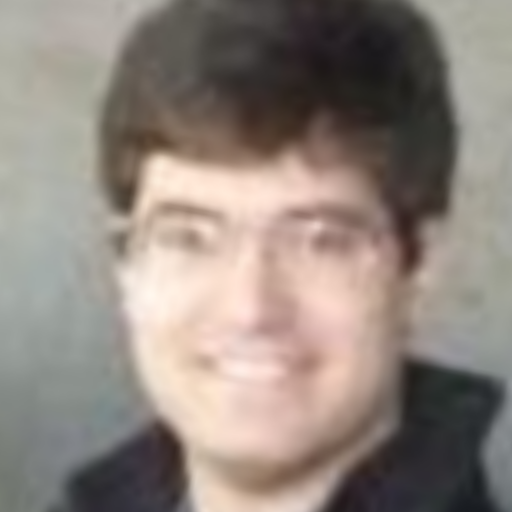

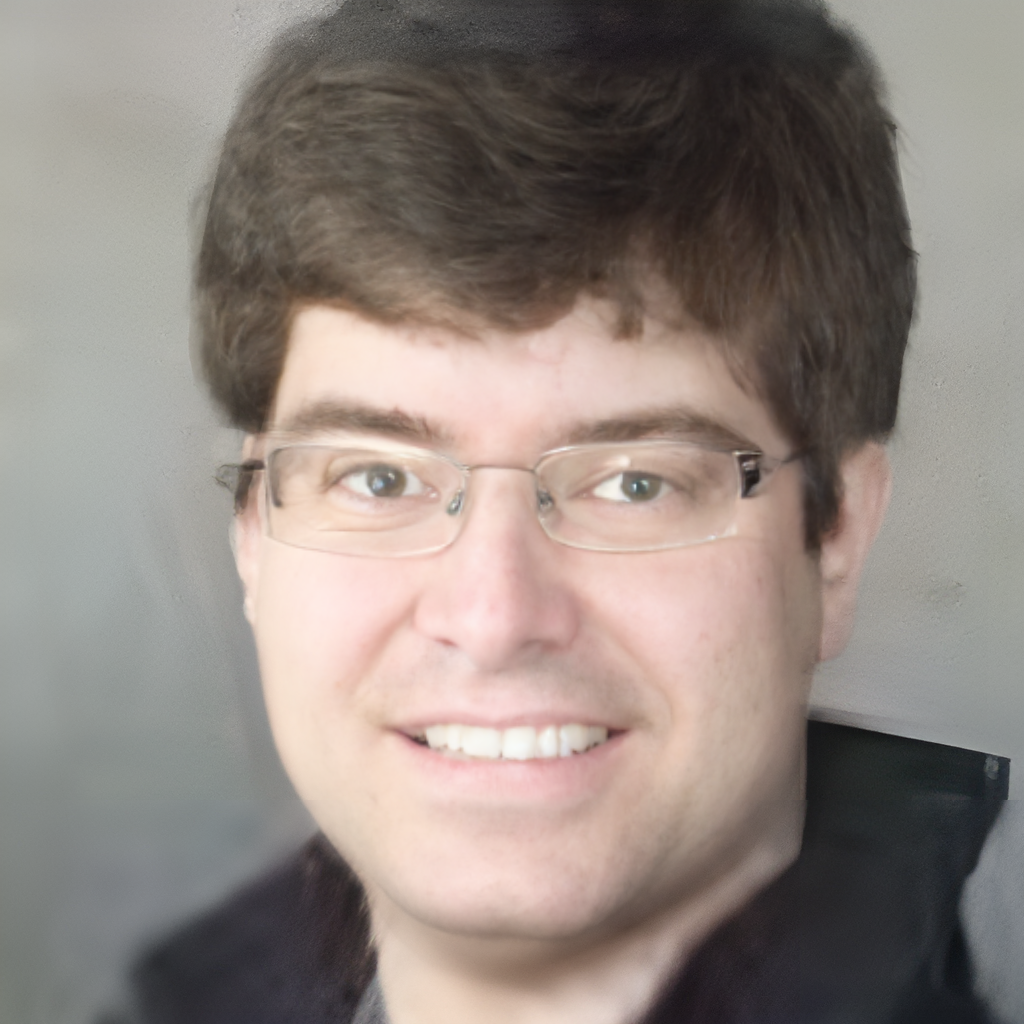

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

input_image = cv2.imread("/content/DifFace/testdata/cropped_faces/0143.png")
cv2_imshow(input_image)
print("\n")
output_image = cv2.imread("/content/result/restored_image/0143.png")
cv2_imshow(output_image)